# <span style='font-family:"Times New Roman"'> <span styel=''> **CANCER EXPLORATION**

## <span style='font-family:"Times New Roman"'> <span styel=''> *Emile Cohen* 
*March 2020*

**Goal:** In this notebook, we have all the visualizations of the cohort based on the cancer types. In the future, we will create Visual Summaries for each cancer.
    
The Notebook is divided in X parts:
   
* **1. Cancer Discovery**
* **2. Metrics Panels per Cancer Type**


**NB1:** In each part, you must run the cells from the begining in order to initialize the variables

**NB2:** All functions used for the plots are located in utils/custom_tools.py

---

In [11]:
%run -i '../../utils/setup_environment.ipy'
from utils.analysis_tools import *

import warnings, math
warnings.filterwarnings('ignore')
import ptitprince as pt
import IPython.display

data_path = '../../data/'

Setup environment... done!


<span style="color:green">✅ Working on **mskimpact_env** conda environment.</span>

---
## Cancer Discovery

### Cancer Type proportion in the cohort

In [27]:
master = pd.read_pickle(data_path + 'merged_data/master_file.pkl')
cancer_count = get_groupby(master, 'Cancer_Type', 'count').sort_values(by=['count'], ascending=False)
cancer_count

,count
Cancer_Type,
Non-Small Cell Lung Cancer,4228
Breast Cancer,4148
Colorectal Cancer,2972
Prostate Cancer,1595
Glioma,1581
Pancreatic Cancer,1485
Melanoma,1094
Endometrial Cancer,1042
Soft Tissue Sarcoma,1039


### Subgroup proportion per cancer type

count                               \
mut_cn_group                   >=1_LOSS 0_HETLOSS 1_WILD_TYPE >1muts   
Cancer_Type                                                            
Appendiceal Cancer                 30.0       5.0         9.0    NaN   
Cervical Cancer                    13.0      31.0         7.0    2.0   
Germ Cell Tumor                    13.0       5.0         5.0    8.0   
Small Bowel Cancer                 32.0       5.0        12.0    2.0   
Gastrointestinal Stromal Tumor     12.0      31.0         9.0    NaN   
Salivary Gland Cancer              45.0      18.0        10.0    NaN   
Mesothelioma                       23.0      50.0         3.0    2.0   
Uterine Sarcoma                    39.0      16.0         4.0    4.0   
Bone Cancer                        30.0      46.0        11.0    2.0   
Skin Cancer, Non-Melanoma          32.0      17.0        15.0   44.0   
Thyroid Cancer                     51.0      42.0        11.0    3.0   
Renal Cell Carcinoma               45.0      67.0        16.0    NaN   
Head and Neck Cancer               43.0      42.0        24.0   39.0   
Small Cell Lung Cancer            173.0       8.0         3.0    7.0   
Soft Tissue Sarcoma               117.0      76.0        16.0   14.0   
Melanoma                           98.0     131.0        26.0   18.0   
Hepatobiliary Cancer              157.0      97.0        38.0    6.0   
Endometrial Cancer                258.0      15.0        72.0   35.0   
Bladder Cancer                    173.0      95.0        54.0   60.0   
Cancer of Unknown Primary         243.0      76.0        50.0   43.0   
Glioma                            104.0      48.0        88.0  101.0   
Esophagogastric Cancer            265.0      37.0        84.0   28.0   
Ovarian Cancer                    442.0      29.0        48.0    3.0   
Prostate Cancer                   307.0     254.0        52.0   14.0   
Pancreatic Cancer                 687.0     103.0       142.0    7.0   
Colorectal Cancer                1361.0     156.0       198.0  116.0   
Breast Cancer                    1005.0     864.0       106.0    9.0   
Non-Small Cell Lung Cancer       1158.0     347.0       322.0  110.0   

                                                 
mut_cn_group                   >=1_cnLOH HOMDEL  
Cancer_Type                                      
Appendiceal Cancer                   7.0    NaN  
Cervical Cancer                      NaN    1.0  
Germ Cell Tumor                     21.0    3.0  
Small Bowel Cancer                   4.0    1.0  
Gastrointestinal Stromal Tumor       4.0    3.0  
Salivary Gland Cancer                6.0    3.0  
Mesothelioma                         2.0    2.0  
Uterine Sarcoma                     14.0   12.0  
Bone Cancer                          6.0    8.0  
Skin Cancer, Non-Melanoma           12.0    4.0  
Thyroid Cancer                      12.0    6.0  
Renal Cell Carcinoma                 8.0    7.0  
Head and Neck Cancer                40.0    5.0  
Small Cell Lung Cancer              52.0    1.0  
Soft Tissue Sarcoma                 34.0   47.0  
Melanoma                            30.0    7.0  
Hepatobiliary Cancer                23.0    8.0  
Endometrial Cancer                  65.0    3.0  
Bladder Cancer                      78.0    9.0  
Cancer of Unknown Primary           70.0    3.0  
Glioma                             154.0   12.0  
Esophagogastric Cancer             106.0    4.0  
Ovarian Cancer                     150.0    3.0  
Prostate Cancer                     30.0   34.0  
Pancreatic Cancer                   72.0   10.0  
Colorectal Cancer                  281.0   21.0  
Breast Cancer                      237.0   41.0  
Non-Small Cell Lung Cancer         348.0   23.0

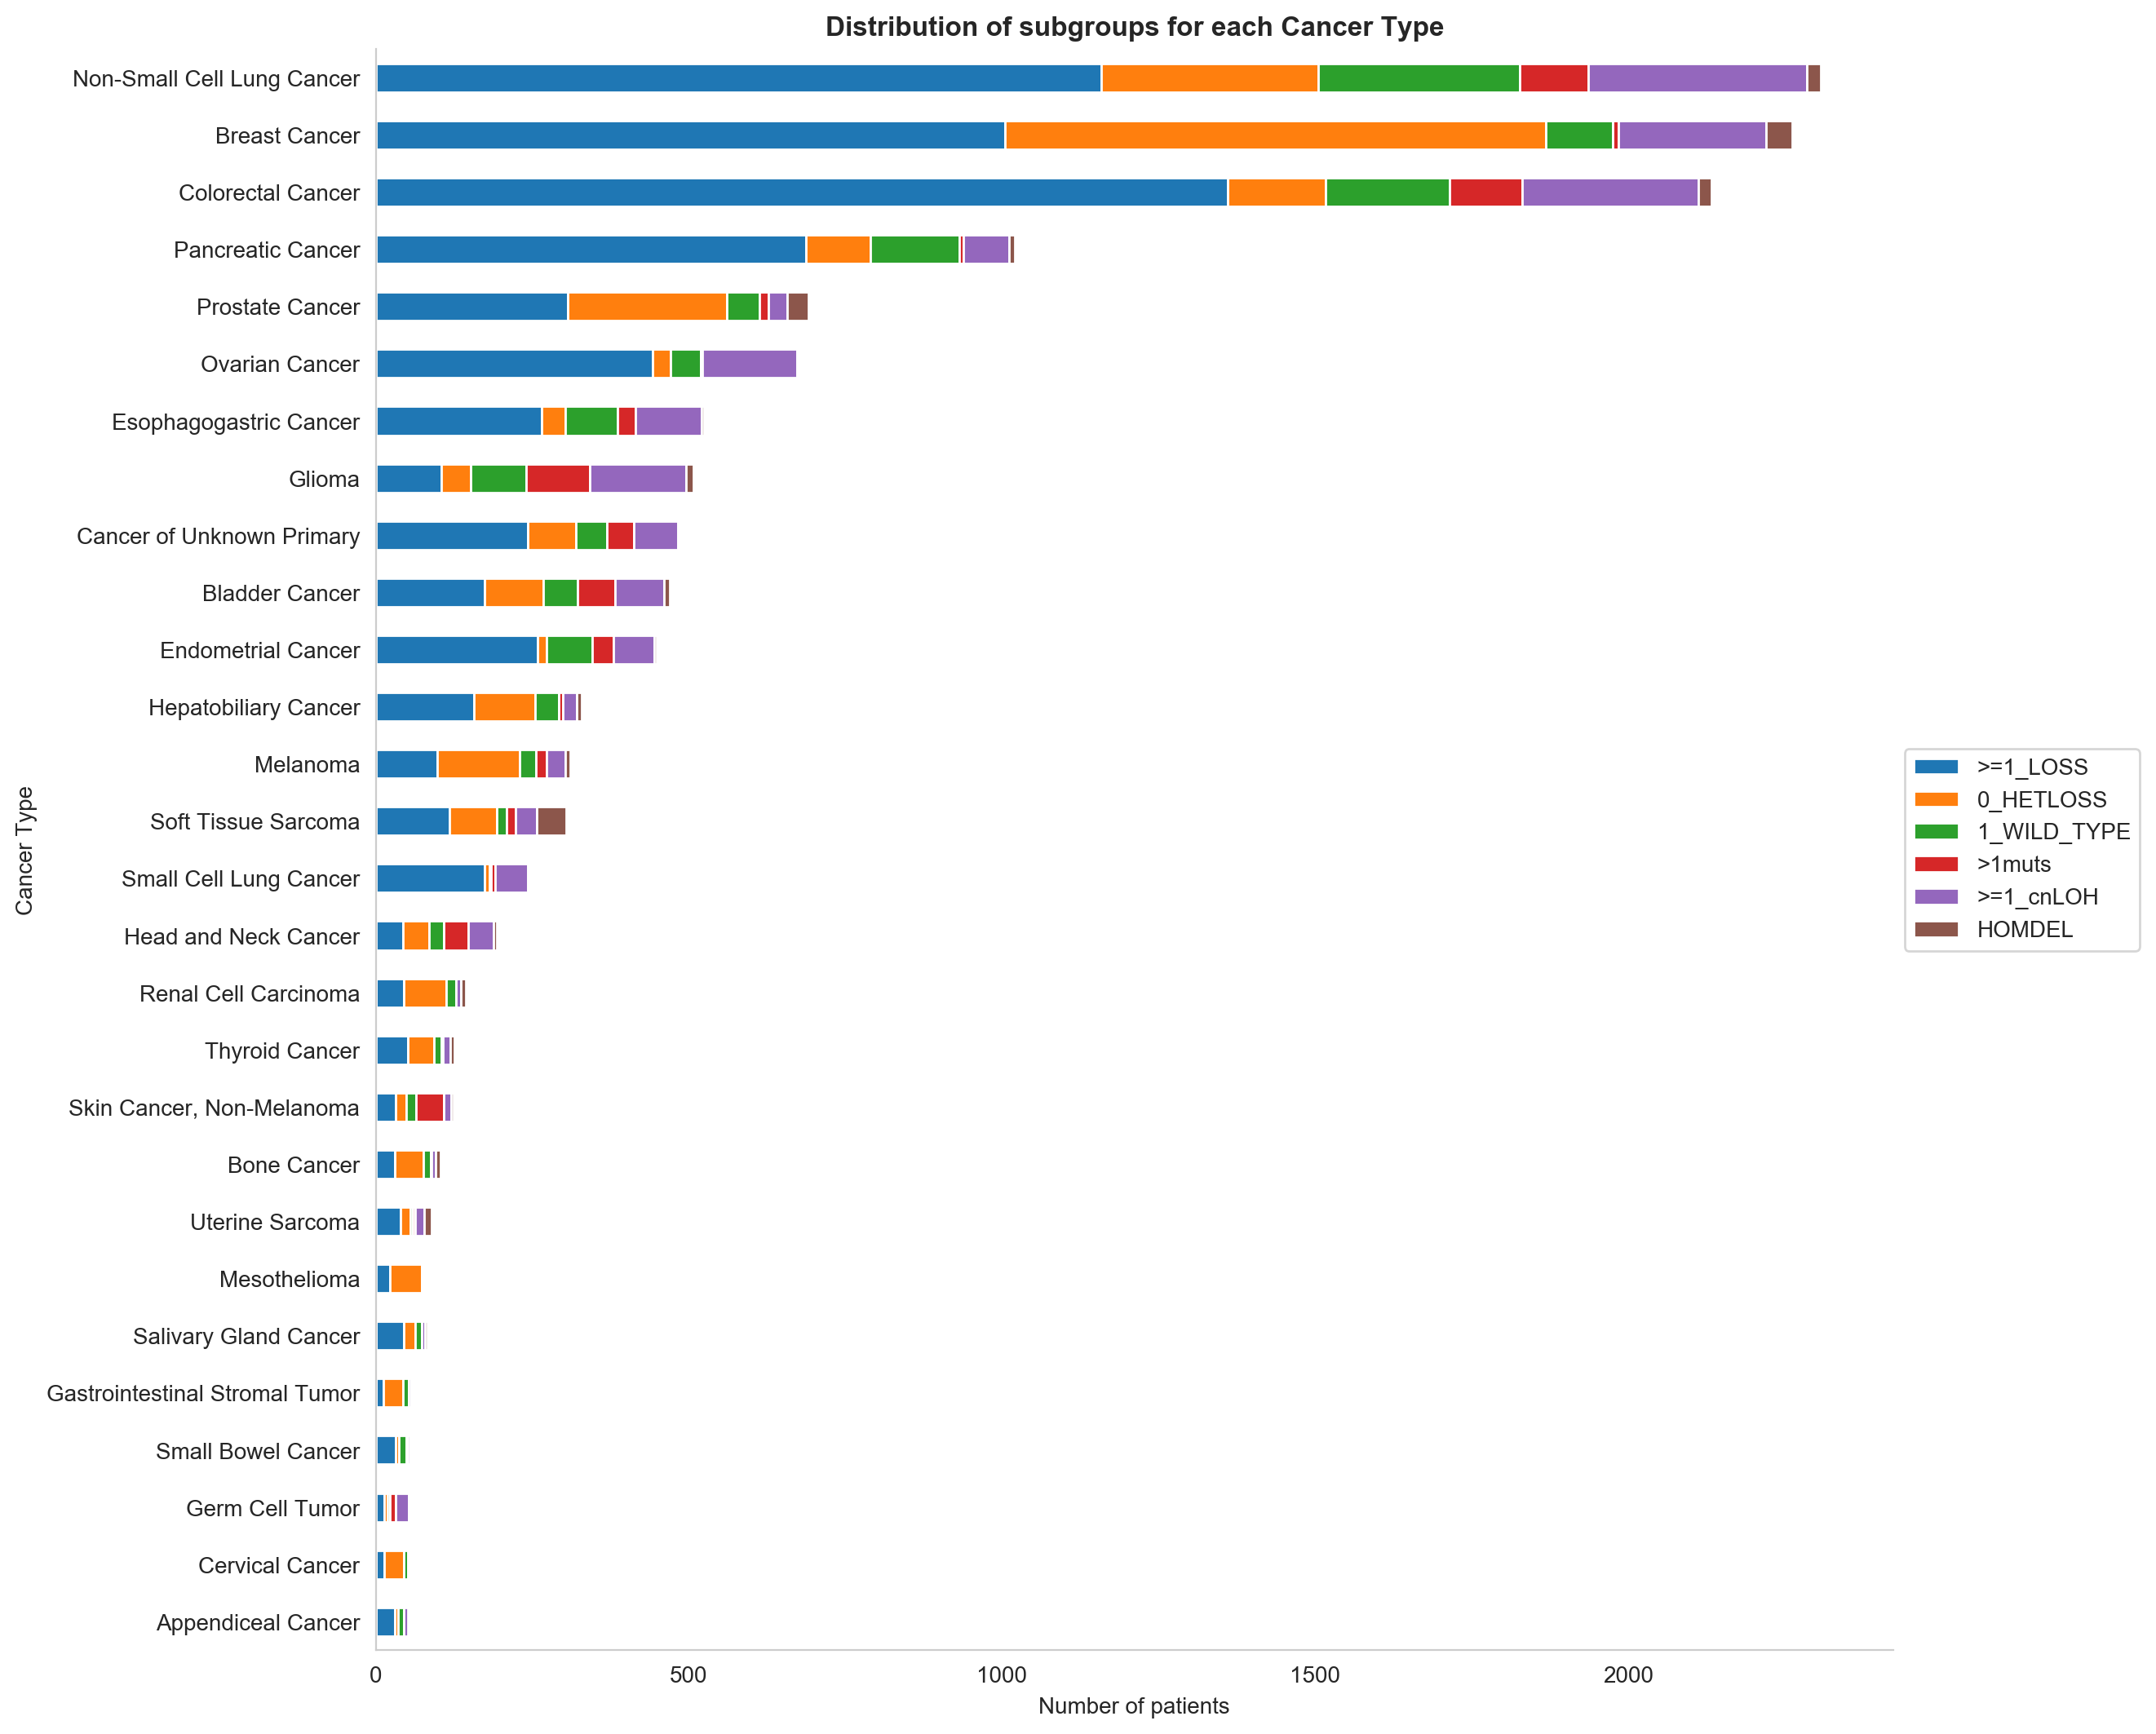

In [34]:
master = pd.read_pickle(data_path + 'merged_data/master_file.pkl')
master_cancer = master[['Cancer_Type', 'mut_cn_group']]
count = pd.DataFrame(pd.DataFrame(master_cancer.groupby(['Cancer_Type','mut_cn_group']).size(), columns=['count'])).unstack()#.groupby(['mut_cn_group','Cancer_Type']).sum()).unstack().sort_values(by=[('count',0)])
count['sum'] = count.sum(axis=1)
count = count[count[('sum','')]>=50]

count = count.sort_values(by=['sum'], ascending=True)[[('count',    '>=1_LOSS'),
                                                       ('count',   '0_HETLOSS'),
                                                        ('count', '1_WILD_TYPE'),
                                                        ('count',      '>1muts'),
                                                        ('count',   '>=1_cnLOH'),
                                                        ('count',      'HOMDEL')]]
display(count)
# We plot the table
get_mstacked_plot(count, 
                  'Distribution of subgroups for each Cancer Type',
                  ['>=1_LOSS','0_HETLOSS', '1_WILD_TYPE','>1muts','>=1_cnLOH','HOMDEL'],
                  'Number of patients',
                  'Cancer Type',
                  figsize = (15,13),
                  horiz=True)